In [44]:
import os
import pandas as pd

path = './plot'

record = dict()
record['task'] = []
record['performance'] = []
record['file'] = []
record['iteration'] = []

for file in os.listdir(path):
    with open(os.path.join(path, file)) as f:
        flag = False
        for line in f.readlines():
            if flag:
                task = line.split()[0]
                iteration = int(line.split()[1])
                performance = float(line.split()[-1])
                record['task'].append(task)
                record['performance'].append(performance)
                record['iteration'].append(iteration)
                record['file'].append(file)
                # print(task, iteration, performance, file)
            if line[:3] == '---':
                flag = True

df = pd.DataFrame(record)
df.head()

,task,performance,file,iteration
0,Mk01.fjs,73.0,with tabu search.txt,0
1,Mk01.fjs,71.0,with tabu search.txt,1
2,Mk01.fjs,66.0,with tabu search.txt,2
3,Mk01.fjs,64.0,with tabu search.txt,3
4,Mk01.fjs,62.0,with tabu search.txt,4


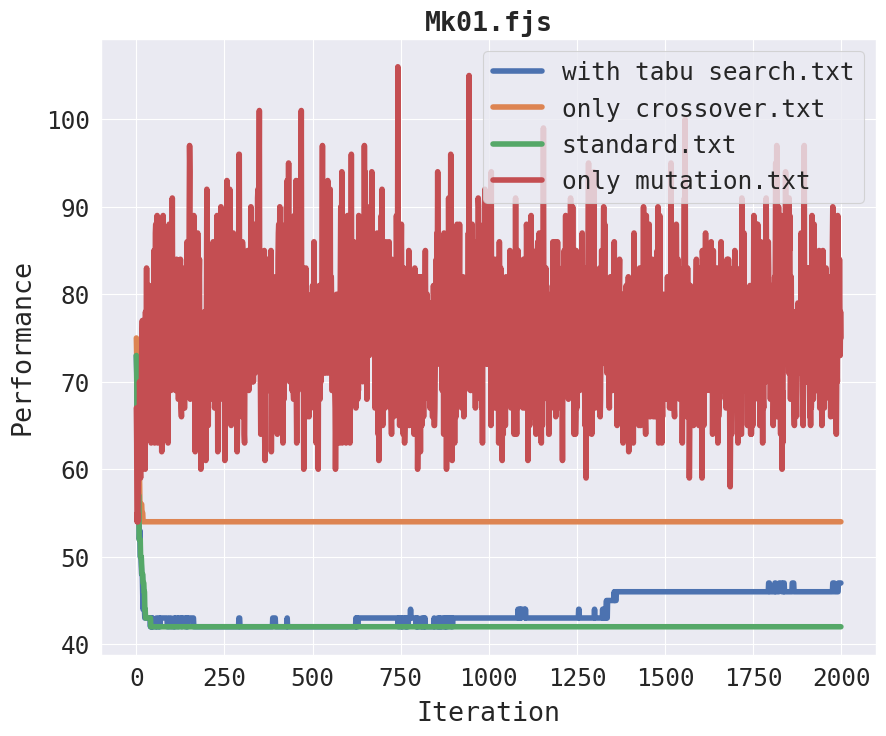

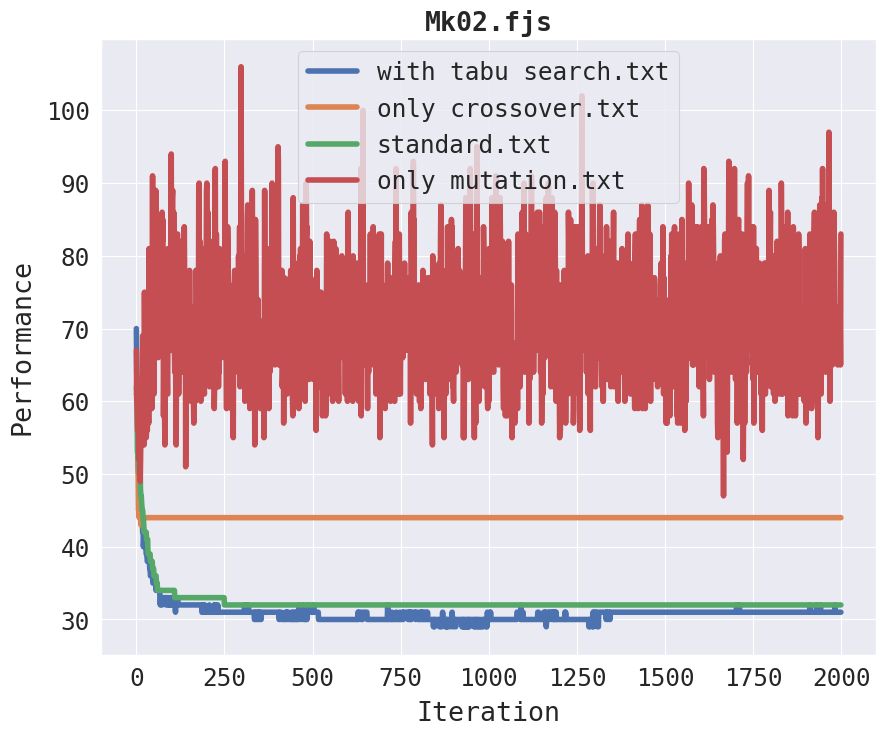

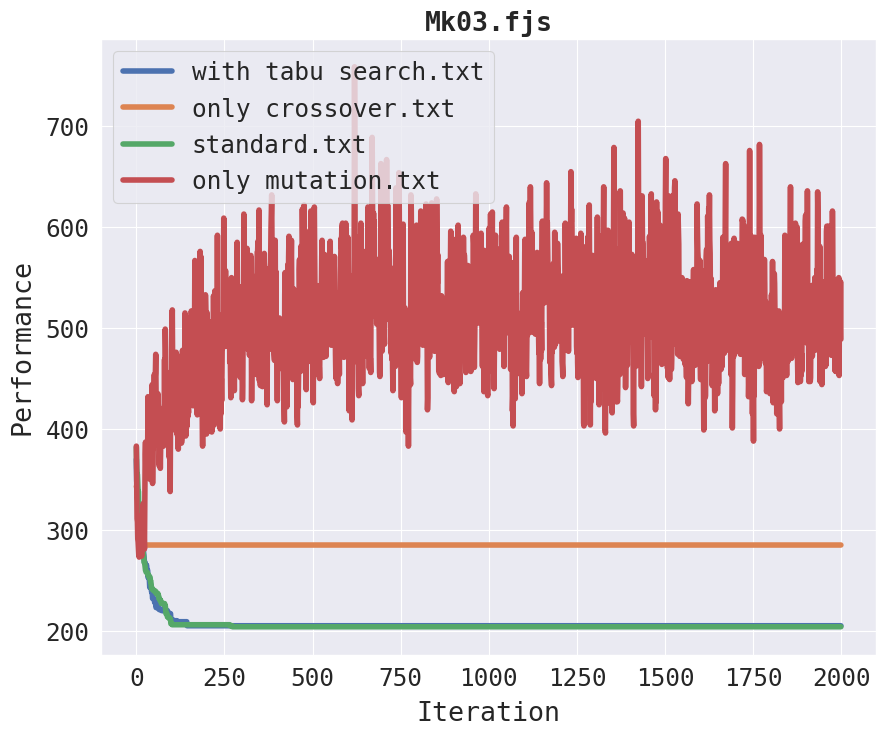

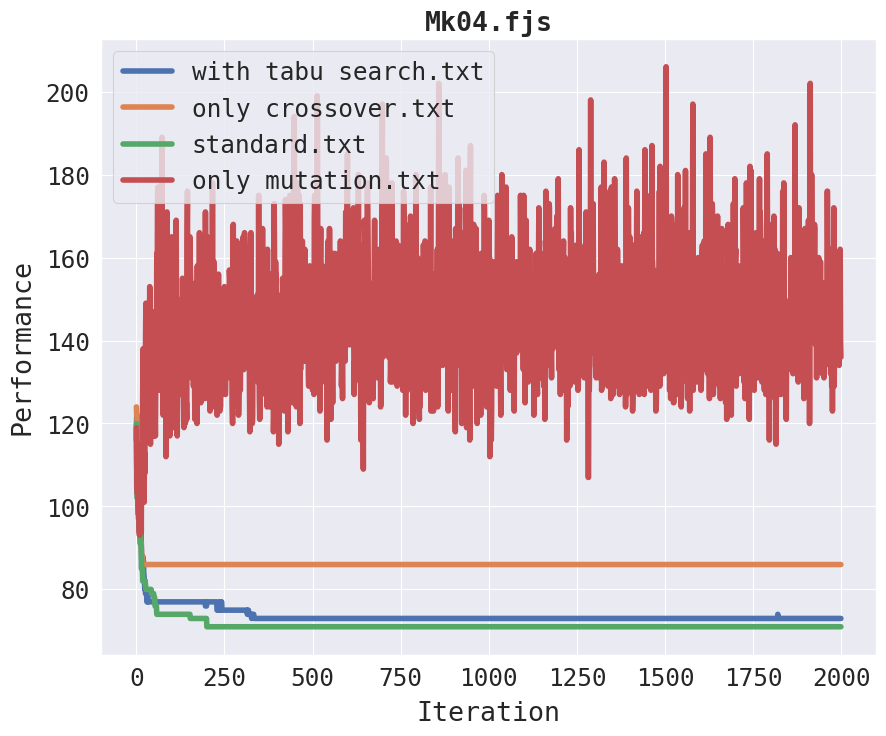

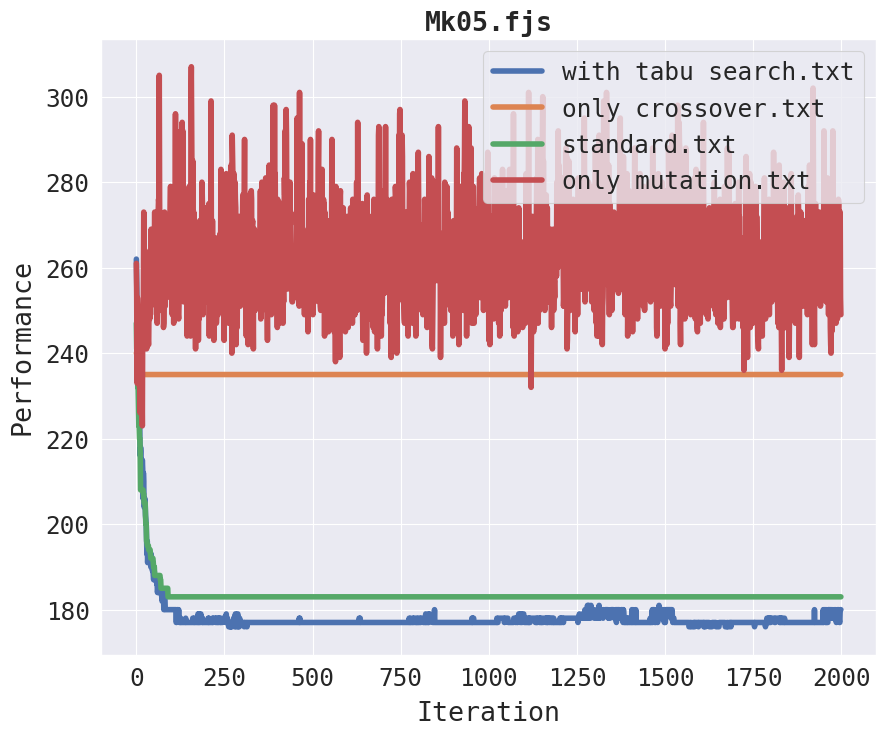

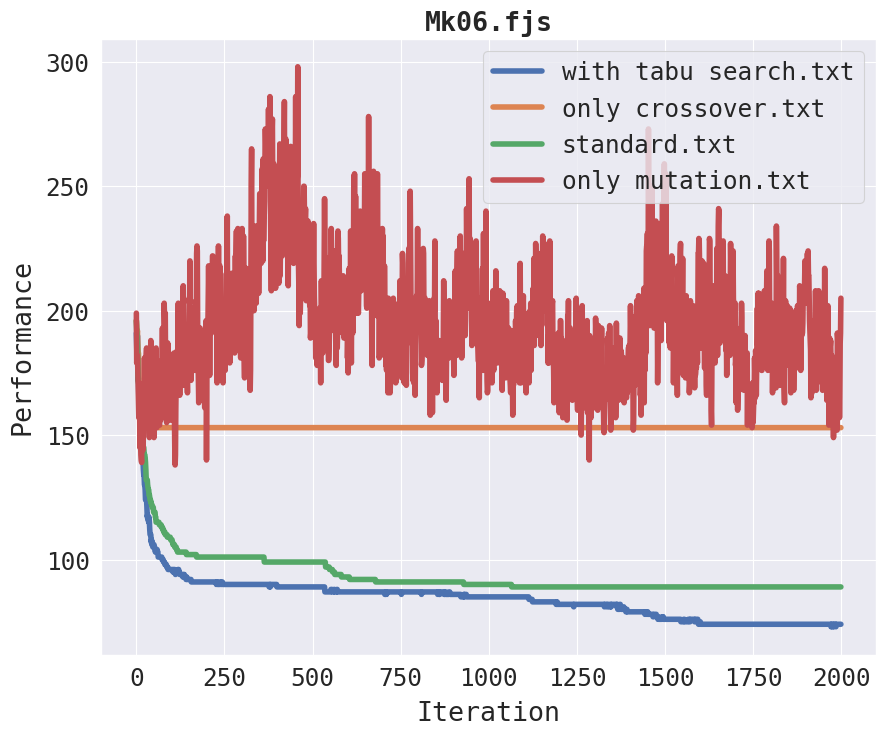

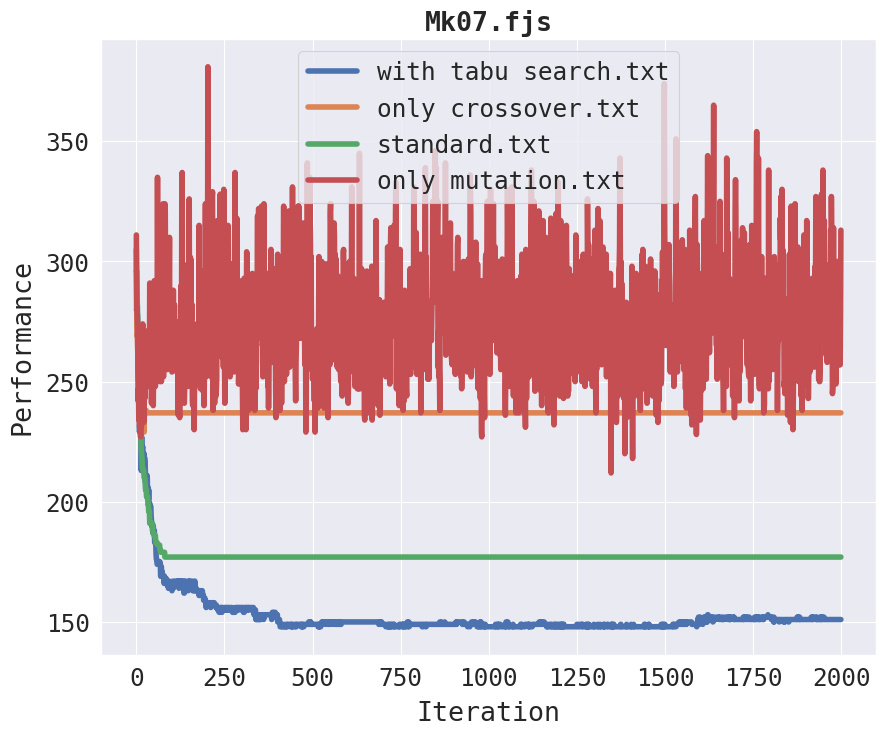

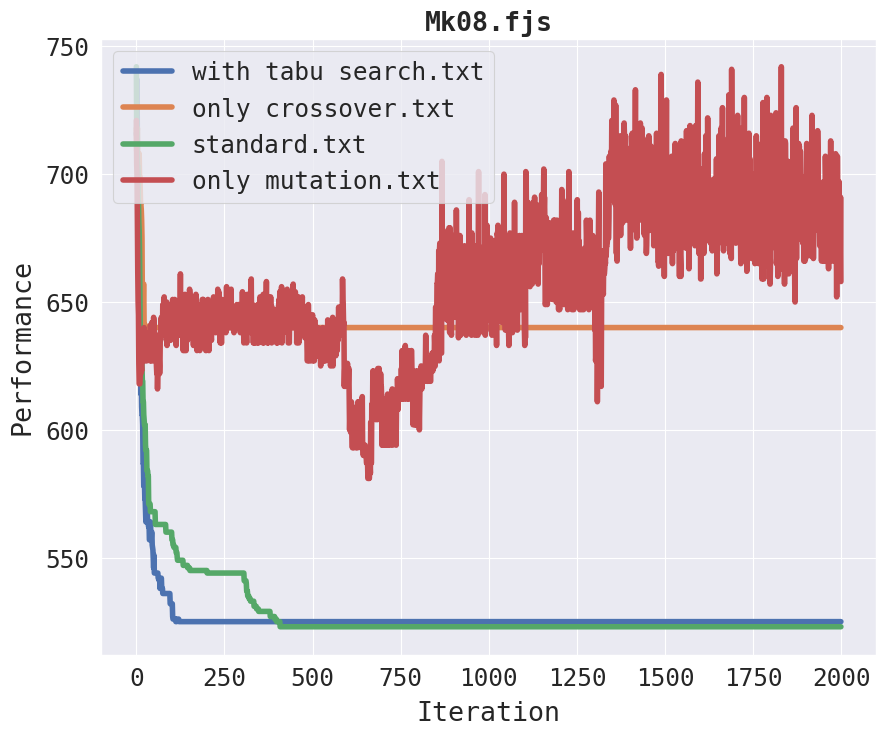

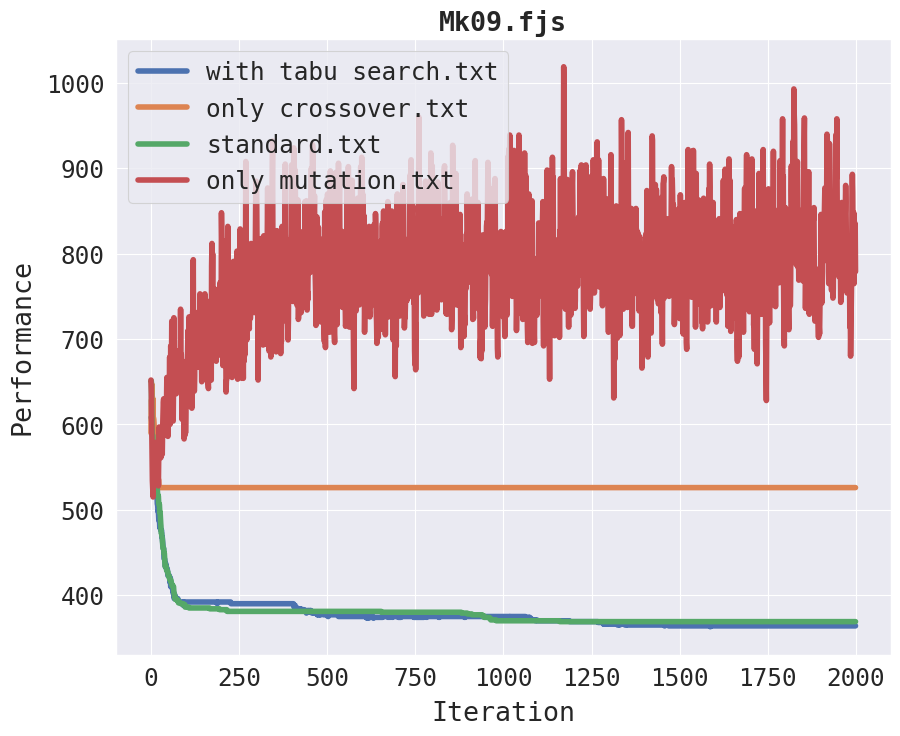

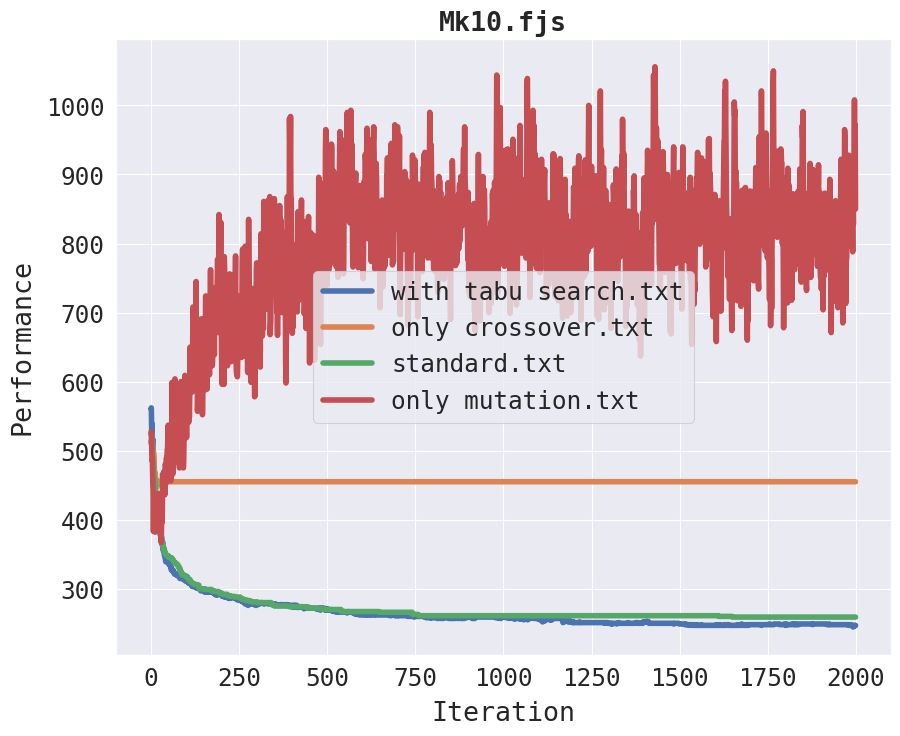

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    style='darkgrid',
    font='monospace',
    context='paper',
    font_scale=2,
)

scalar=2.0


for i in range(1, 11):

    task = f'Mk{i:02d}.fjs'
    plt.figure(figsize=(5*scalar, 4*scalar))
    graph = sns.lineplot(
        data=df[df.task == task],
        x='iteration',
        y='performance',
        hue='file',
        linewidth=4.0,
        markers=False,
        dashes=False,
        markersize=12.0,
    )
    plt.legend(loc='best').set_draggable(True)
    graph.set_xlabel(xlabel='Iteration', labelpad=7)
    graph.set_ylabel(ylabel='Performance', labelpad=7)
    # graph.set_yticks([])
    graph.set_title(label=task, fontdict=dict(weight='bold'))

    plt.show()